# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


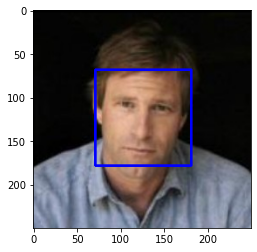

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Results are printed out following each cell and summarized in a table below optional detector using `MTCNN`

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

for key, cohort in {'human_files_short': human_files_short, 'dog_files_short': dog_files_short}.items():
    face_detected = 0
    for face in cohort:
        if face_detector(face):
            face_detected += 1
    
    print(f'% human faces detected in {key} = {round(face_detected/len(human_files_short) * 100, 2)}')

% human faces detected in human_files_short = 96.0
% human faces detected in dog_files_short = 18.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# Try a pretrained classifier - MTCNN 
# (See https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
 
def deep_face_detector(image):
    # load image from file
    pixels = pyplot.imread(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    # display faces on the original image
    return 1 if faces else 0

for key, cohort in {'human_files_short': human_files_short, 'dog_files_short': dog_files_short}.items():
    face_detected = 0
    for face in cohort:
        if deep_face_detector(face):
            face_detected += 1
    
    print(f'% human faces detected in {key} = {round(face_detected/len(human_files_short) * 100, 2)}')

% human faces detected in human_files_short = 100.0
% human faces detected in dog_files_short = 17.0


*Interesting that this ML face detector still detects 17% of dog images as having human faces, compared to 18% using `face_cascade` in `cv2`*. When I actually look through the 100 dog files, a number of them do have humans in the frame that are being detected. However, some of the dog faces *are* being detected as human, so the false positive rate should be less than 17%, but still greater than zero. Looking through the images, five of the 17 mis-identified images actually have humans in them, so the real false positive value is 12%.

Also, on Linux the percentages are different:

| Type of Image | % Det Windows - CV2 | % Det Windows - MTCNN | % Det Linux - CV2 | % Det Linux - MTCNN |
|:--------------|:-------------------:|:---------------------:|:-----------------:|:-------------------:|
| Human | 96.0 | 100.0 | 97.0 | 100.0 |
| Dog   | 18.0 | 17.0 | 15.0 | 33.0 |

The performance on the dog dataset under Linux for MTCNN method was very bad. 

>NOTE: I did not perform any image tweaking prior to feeding images into MTCNN. May come back to this and try converting to grayscale before passing image into detector.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    input_image = Image.open(img_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
    
    input_image = Image.open(img_path)
    input_image = preprocess(input_image)
    input_image = Variable(input_image)
    input_image = input_image.unsqueeze(0)
    
    if torch.cuda.is_available():
        input_image = input_image.to('cuda')
        VGG16.to('cuda')

    VGG16.eval()
#     with torch.no_grad():
    output = VGG16(input_image)
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#     print(output[0])
    _, index = output[0].max(0)
#     print(index)

    return int(index.numpy()) # predicted class index

In [8]:
with open("imagenet1000_clsidx_to_labels.txt") as f:
    idx2label = eval(f.read())

In [9]:
pred = VGG16_predict('dogImages/train/016.Beagle/Beagle_01132.jpg')

print(idx2label[pred])

beagle


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    
    dog_detected = False
    if pred in range(151, 269):
        dog_detected = True
    
    return dog_detected # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
The dog detector correctly identified 94% of the dogs in `dog_files_short`, with no false positives (0%) in the cohort of human images in `human_files_short` detected as dogs.

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

for key, cohort in {'human_files_short': human_files_short, 'dog_files_short': dog_files_short}.items():
    dog_detected = 0
    for image in cohort:
        if dog_detector(image):
            dog_detected += 1
            
    print(f'% dogs detected in {key} = {round(dog_detected/len(human_files_short) * 100, 2)}')

% dogs detected in human_files_short = 0.0
% dogs detected in dog_files_short = 94.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define VGG16 model
model = models.wide_resnet101_2(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    model = model.cuda()

In [17]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def model_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    input_image = Image.open(img_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
    
    input_image = Image.open(img_path)
    input_image = preprocess(input_image)
    input_image = Variable(input_image)
    input_image = input_image.unsqueeze(0)
    
    if torch.cuda.is_available():
        input_image = input_image.to('cuda')
        model.to('cuda')

    model.eval()
    output = model(input_image)
    
    _, index = output[0].max(0)

    return int(index.numpy()) # predicted class index

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def model_dog_detector(img_path):
    ## TODO: Complete the function.
    pred = model_predict(img_path)
    
    dog_detected = False
    if pred in range(151, 269):
        dog_detected = True
    
    return dog_detected # true/false

In [19]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

for key, cohort in {'dog_files_short': dog_files_short, 'human_files_short': human_files_short}.items():
    dog_detected = 0
    for image in cohort:
        if model_dog_detector(image):
            dog_detected += 1
            
    print(f'% dogs detected in {key} = {round(dog_detected/len(human_files_short) * 100, 2)}')

% dogs detected in dog_files_short = 95.0
% dogs detected in human_files_short = 0.0


#### Results Table

Acceptable results taken to be &ge; VGG16 results. I could not get the `inception` model to run even after adjusting transforms to input 299x299 pixel images as specified, so I ran a bunch of others while doing other things. Linux results are different for these models as well.

| Model | % Dogs Detected | % Humans Detected | Acceptable? |
|:------|:---------------:|:-----------------:|:-----------:|
| **VGG16** | **94.0** | **0.0** | **&check;** |
| squeezenet1_1 | 96.0 | 1.0 | &check; |
| googlenet | 93.0 | 0.0 | &Chi; |
| densenet201 | 97.0 | 0.0 | &check; |
| resnet50 | 95.0 | 0.0 | &check; |
| resnet101 | 95.0 | 0.0 | &check; |
| resnet152 | 92.0 | 1.0 | &Chi; |
| alexnet | 96.0 | 1.0 | &check; |
| mnasnet1_0 | 93.0 | 0.0 | &Chi; |
| mobilenet_v2 | 94.0 | 0.0 | &check; |
| shufflenet_v2_x1_0 | 95.0 | 1.0 | &check; |
| wide_resnet101_2 | 95.0 | 0.0 | &check; |



---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [20]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Much of this drawn from video lessons

batch_size = 32
num_workers = 0

data_dir = 'dogImages'

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Include minor augmentation in train transforms
train_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomAffine(0, translate=(0.2, 0.2)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# To be used for test & validation - no augmentation
test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=test_transform)

# Had to refactor this into a dict...
loaders_scratch = {'train': torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True),
                   'valid': torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=False),
                   'test': torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I used the standard resize and crop dimensions. The final height and width dimension of 224 matches what is used in the majority of the models trained on ImageNet, with the exception of `inception`. If my model happens to perform fantastically well (ha!), I would like other people to be able to use it without modification. Resizing down to 256x256 before the final crop ensures that minimal information is lost, while focusing on the subject of the image, which is assumed to be centered. I used the means and standard deviations for the ImageNet database for normalization.

For the training data I specified a random rotation of 30 degrees, as well as a random horizontal flip. These transforms were added to augment the data and aid in preventing overfitting. I also added random horizontal and vertical translation to the training data transforms, again to avoid overfitting.

The test and validation data is not augmented since that data is not used to modify the weights, and it needs to remain the same to accurately track loss and accuracy.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [21]:
# Re-adding stuff as necessary so I don't have to re-run everything above on kernel restarts
import numpy as np
# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [22]:
classes = len(next(os.walk(train_dir))[1])

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, stride = 2, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1 * 1 * 128, 500) # I *think* this will be 1 * 1 * 128 w/ 4th layer
        self.fc2 = nn.Linear(500, classes)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        # Flatten
        x = x.view(-1, 1 * 1 * 128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I started with a similar architecture to the one used in the `cifar10` exercise, but I wanted to add one more convolutional layer for better performance since the input images are in color and categorizing breeds requires more features than just detecting whether an image is of a dog.

I stuck with a standard kernel of 3 and padding of 1, with a stride of 2 for the first three `Conv2d` layers. The last layer has a default stride of 1 since the output of the convolutional and pooling layers had already gotten down to a size of 1x1x128. If I had run into issues with training I planned to go back and change the stride on one or more previous layers, but the model trained well.

Some dropout as added before each fully connected layer to mitigate overfitting.

The final fully connected layer has an output of `classes`, which in this case is 133, the number of dog breeds represented in the training data.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [24]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)
# Tried lr = 0.01, but training not going well

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [25]:
# the following import is required for training to be robust to truncated images
import time
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        epoch_start = time.time()
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0        
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            batch_start = time.time()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            
            ## find the loss and update the model parameters accordingly
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Occasionally print progress
            if (batch_idx+1) % 100 == 0:
                print(f'Epoch: {epoch}, Batch: {batch_idx + 1}, Training loss: {train_loss}')
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}, \tEpoch Time: {:.2f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            time.time() - epoch_start
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1, Batch: 100, Training loss: 4.8883056640625
Epoch: 1, Batch: 200, Training loss: 4.885876655578613
Epoch: 1 	Training Loss: 4.884406 	Validation Loss: 4.865050, 	Epoch Time: 231.76
Validation loss decreased (inf --> 4.865050).  Saving model ...
Epoch: 2, Batch: 100, Training loss: 4.873532772064209
Epoch: 2, Batch: 200, Training loss: 4.86857271194458
Epoch: 2 	Training Loss: 4.868211 	Validation Loss: 4.845470, 	Epoch Time: 284.57
Validation loss decreased (4.865050 --> 4.845470).  Saving model ...
Epoch: 3, Batch: 100, Training loss: 4.837907314300537
Epoch: 3, Batch: 200, Training loss: 4.826930046081543
Epoch: 3 	Training Loss: 4.825313 	Validation Loss: 4.747935, 	Epoch Time: 273.68
Validation loss decreased (4.845470 --> 4.747935).  Saving model ...
Epoch: 4, Batch: 100, Training loss: 4.7630414962768555
Epoch: 4, Batch: 200, Training loss: 4.746085166931152
Epoch: 4 	Training Loss: 4.743053 	Validation Loss: 4.663902, 	Epoch Time: 283.13
Validation loss decreased (4.747

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [26]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.815105


Test Accuracy: 11% (94/841)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [27]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch # No need to make a copy as no mods are made

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [28]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# densenet201 performed the best on dog detection, so I'll use that as a starter
model_transfer = models.densenet201(pretrained=True)

# Not training the feature detection parameters 
for param in model_transfer.features.parameters():
    param.requires_grad = False

if use_cuda:
    model_transfer = model_transfer.cuda()
    
# Change the classifier to give the approprite number of outputs
model_transfer.classifier = nn.Linear(1920, classes)

In [29]:
model_transfer.classifier

Linear(in_features=1920, out_features=133, bias=True)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I used `densenet201` as a starting point as it was the top performer in my survey of models when implementing the optional pre-trained networks.

The feature parameters were frozen since those were not to be trained.

The classifier was replaced with a linear fully connected layer with an input size of 1920 to match the output of the `densenet201` features section, and an output size of `classes`, which in this case is 133, the number of dog breeds represented in the training data.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
# Use CrossEntropyLoss since this is a classification task
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [32]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

# train the model
model_transfer = train(8, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1, Batch: 100, Training loss: 4.4685187339782715
Epoch: 1, Batch: 200, Training loss: 4.180477142333984
Epoch: 1 	Training Loss: 4.159315 	Validation Loss: 3.441053, 	Epoch Time: 3067.27
Validation loss decreased (inf --> 3.441053).  Saving model ...
Epoch: 2, Batch: 100, Training loss: 3.3016421794891357
Epoch: 2, Batch: 200, Training loss: 3.0998640060424805
Epoch: 2 	Training Loss: 3.084663 	Validation Loss: 2.505867, 	Epoch Time: 6488.91
Validation loss decreased (3.441053 --> 2.505867).  Saving model ...
Epoch: 3, Batch: 100, Training loss: 2.5038516521453857
Epoch: 3, Batch: 200, Training loss: 2.372561454772949
Epoch: 3 	Training Loss: 2.362536 	Validation Loss: 1.893841, 	Epoch Time: 3363.59
Validation loss decreased (2.505867 --> 1.893841).  Saving model ...
Epoch: 4, Batch: 100, Training loss: 1.973443627357483
Epoch: 4, Batch: 200, Training loss: 1.895837426185608
Epoch: 4 	Training Loss: 1.890088 	Validation Loss: 1.540939, 	Epoch Time: 3393.80
Validation loss decrea

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [33]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.152030


Test Accuracy: 81% (689/841)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [34]:
plt.rcParams["figure.figsize"] = (8, 6)

In [35]:
from PIL import Image
from torch.autograd import Variable

def preprocess_image(img_path):
    preprocess_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    input_image = Image.open(img_path)
    input_image = preprocess_transform(input_image)
    input_image = Variable(input_image)
    input_image = input_image.unsqueeze(0)
    
    return input_image 

In [36]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = preprocess_image(img_path)
    
    if torch.cuda.is_available():
        image = image.to('cuda')
        model_transfer.to('cuda')

    model_transfer.eval()
    output = model_transfer(image)

    _, index = output[0].max(0)
    index = int(index.cpu().numpy())

    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [37]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        title = 'Dog detected!'
        xlabel = f'I think the breed is {predict_breed_transfer(img_path).lower()}'

    elif face_detector(img_path):
        title = 'Hooman detected!'
        xlabel = f'That hooman looks like a[n] {predict_breed_transfer(img_path).lower()}'

    else:
        title = 'I don\'t know what that is!'
        xlabel = f'I don\'t know what that is.\nWhat is that thing?\nI don\'t know, but I want my picture taken with it. (Steve Martin)'
       
    fig, ax = plt.subplots()
    ax.imshow(Image.open(img_path))
    ax.set_xlabel(xlabel)
    ax.set_title(title);


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
The output is better than I expected in terms of detecting dogs vs humans vs other things. It does reasonably well on determining the breed of dog, though as noted in the instructions the differences between many breeds is subtle.

Some points for improvement:

- The face detector does not do well on images that are not front-facing and centered. More effort could be put into preprocessing images to center the faces.
- Train `model_transfer` for more epochs. I only trained for five full epochs before stopping the training in the interest of time. The training loss was still decreasing, so performance should improve with more training. I will train it for eight epochs before submitting the final project.
- `densenet201` is capable of detecting all 1000 classes in the ImageNet database. It would be interesting to use an unmodified model to attempt to identify the objects that are not human faces or dogs, rather than using a generic "I don't know" output.
- [Extra] I had planned to have a `%reset -f` below Step 5 and re-import all of the necessary modules, but there was a lot of infrastructure that would need to be repeated or refactored, such as the train loaders and so forth, so I did not do that. I may come back to this and use the `model_transfer` checkpoint to create a standalone "app".

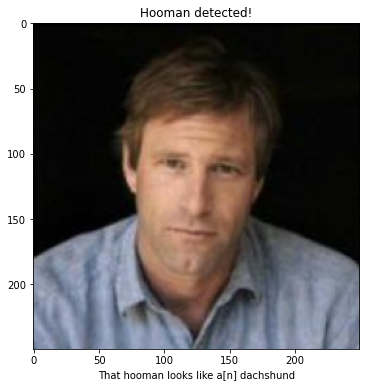

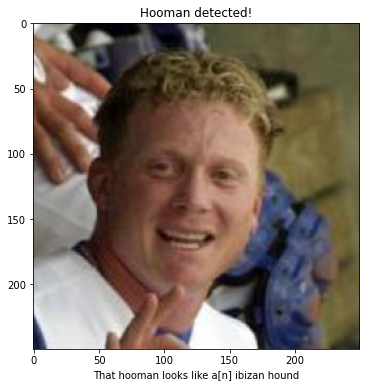

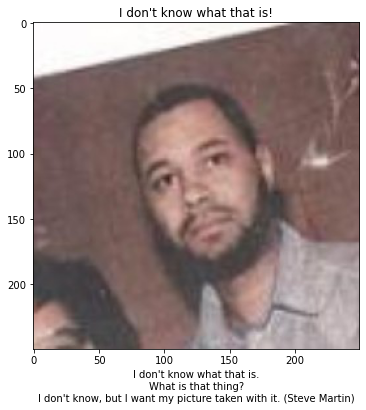

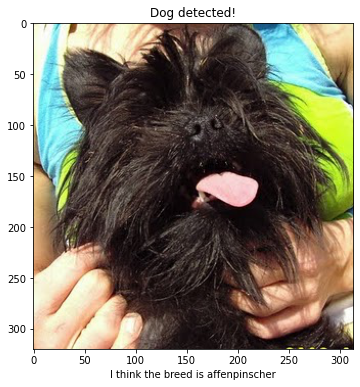

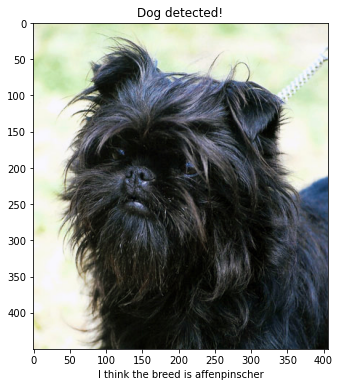

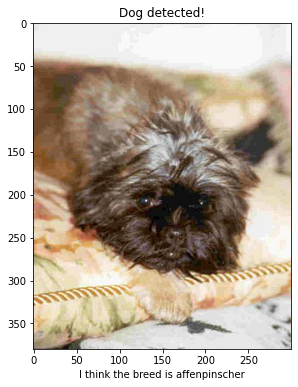

In [38]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

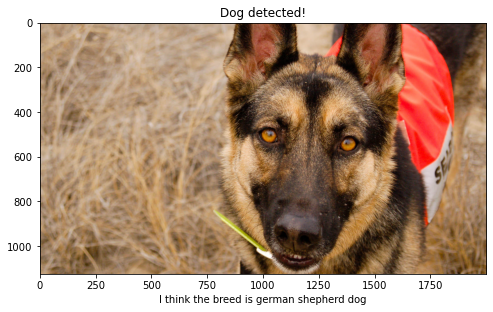

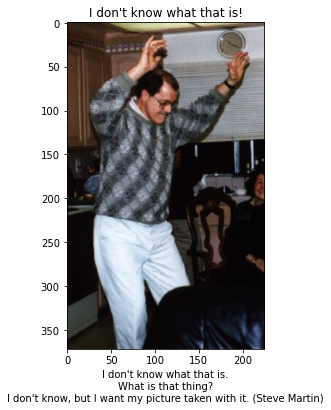

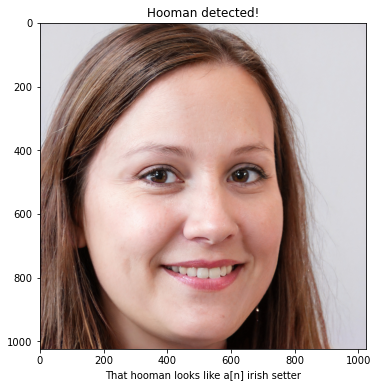

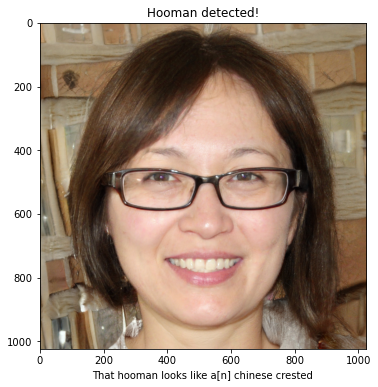

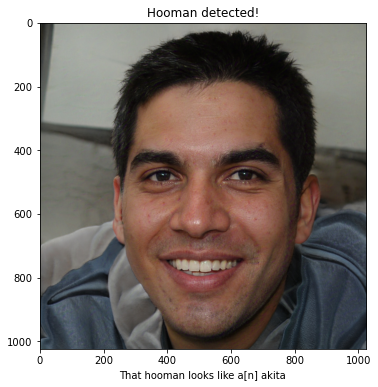

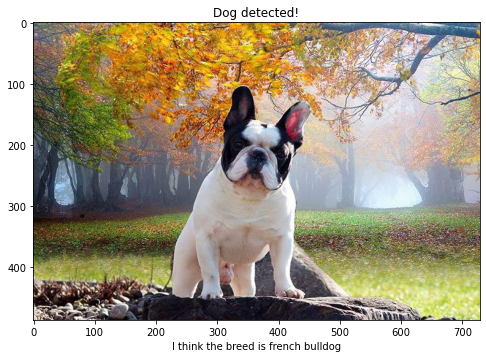

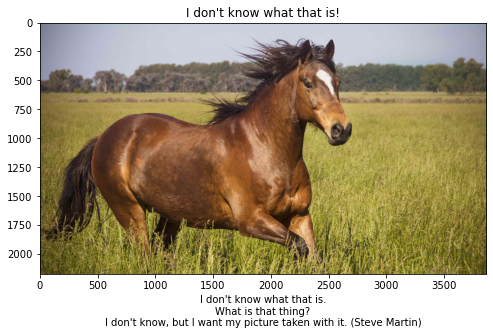

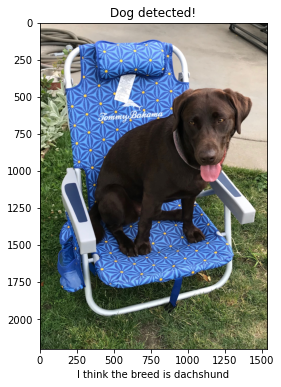

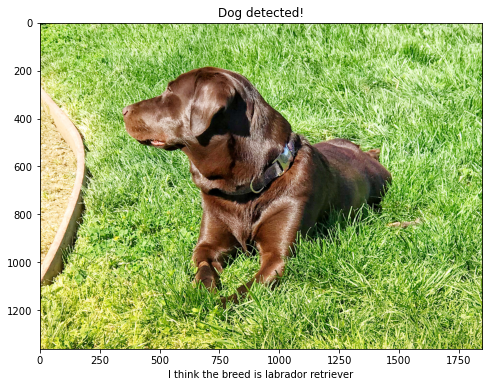

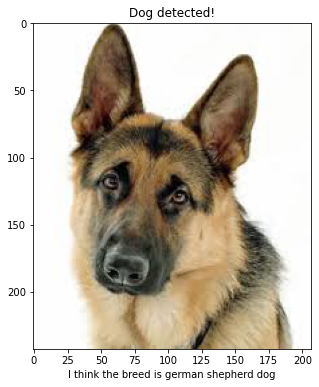

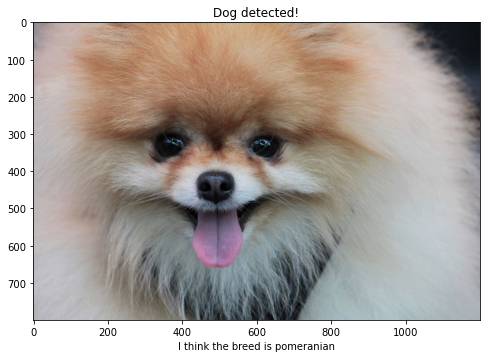

In [39]:
# My own set of images, mainly taken from the web
# Close-up faces from https://www.thispersondoesnotexist.com/

# load filenames for human and dog images
test_files = np.array(glob("appTestImages/*"))
# print (test_files)

for file in test_files:
    run_app(file)